In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import dp_algorithms

data = pd.read_csv('data/student-por.csv', sep = ';')

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [2]:
# convert all the features into numerical ones
data['school']     = data['school'].apply(lambda x: 0 if x == "GP" else 1)
data['sex']        = data['sex'].apply(lambda x: 0 if x == "F" else 1)
data['paid']       = data['paid'].apply(lambda x: 0 if x == "no" else 1)
data['address']    = data['address'].apply(lambda x: 0 if x == "R" else 1)
data['famsize']    = data['famsize'].apply(lambda x: 0 if x == "GT3" else 1)
data['Pstatus']    = data['Pstatus'].apply(lambda x: 0 if x == "A" else 1)
data['Mjob']       = data['Mjob'].apply(lambda x: 1 if x == "teacher" else 2 \
                                        if x == "health" else 3 if x == "services" else 4 \
                                        if x == "at_home" else 5)
data['Fjob']       = data['Fjob'].apply(lambda x: 1 if x == "teacher" else 2 \
                                        if x == "health" else 3 if x == "services" else 4 \
                                        if x == "at_home" else 5)
data['reason']     = data['reason'].apply(lambda x: 1 if x == "home" else 2 \
                                          if x == "reputation" else 3 if "course" else 4)
data['guardian']   = data['guardian'].apply(lambda x: 1 if x == "mother" else 2 \
                                            if x == "father" else 3)
data['schoolsup']  = data['schoolsup'].apply(lambda x: 0 if x == "no" else 1)
data['famsup']     = data['famsup'].apply(lambda x: 0 if x == "no" else 1)
data['activities'] = data['activities'].apply(lambda x: 0 if x == "no" else 1)
data['nursery']    = data['nursery'].apply(lambda x: 0 if x == "no" else 1)
data['higher']     = data['higher'].apply(lambda x: 0 if x == "no" else 1)
data['internet']   = data['internet'].apply(lambda x: 0 if x == "no" else 1)
data['romantic']   = data['romantic'].apply(lambda x: 0 if x == "no" else 1)

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,4,1,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,4,5,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,4,5,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,2,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,5,5,...,4,3,2,1,2,5,0,11,13,13


In [4]:
target = data['G3']
data = data.drop('G3', axis = 1)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,4,1,...,0,4,3,4,1,1,3,4,0,11
1,0,0,17,1,0,1,1,1,4,5,...,0,5,3,3,1,1,3,2,9,11
2,0,0,15,1,1,1,1,1,4,5,...,0,4,3,2,2,3,3,6,12,13
3,0,0,15,1,0,1,4,2,2,3,...,1,3,2,2,1,1,5,0,14,14
4,0,0,16,1,0,1,3,3,5,5,...,0,4,3,2,1,2,5,0,11,13


In [5]:
# center the features and ensure that each row has its euclidean norm <= 1
data = data - data.mean()
data = data.divide(np.linalg.norm(data.values, axis = 1), axis = 0)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,-0.028101,-0.033075,0.101339,0.024495,-0.023874,-0.070751,0.119866,0.136652,0.023625,-0.246074,...,-0.029718,0.005595,-0.014548,0.065777,-0.040536,-0.103329,-0.043271,0.027480,-0.919886,-0.046007
1,-0.077373,-0.091068,0.056832,0.067445,-0.065733,0.027389,-0.336540,-0.290321,0.065048,0.211236,...,-0.081824,0.237598,-0.040056,-0.041083,-0.111609,-0.284501,-0.119141,-0.368721,-0.533054,-0.126673
2,-0.074360,-0.087521,-0.372458,0.064818,0.150365,0.026322,-0.323433,-0.279015,0.062515,0.203009,...,-0.078637,0.014806,-0.038496,-0.253022,0.106276,0.153655,-0.114501,0.499792,0.128320,0.305337
3,-0.050302,-0.059205,-0.251955,0.043847,-0.042734,0.017806,0.214563,-0.044293,-0.246614,-0.151574,...,0.091256,-0.134436,-0.170493,-0.171161,-0.072560,-0.184960,0.211447,-0.528617,0.375707,0.351002
4,-0.066354,-0.078098,-0.141809,0.057839,-0.056371,0.023488,0.092484,0.132120,0.246330,0.181151,...,-0.070170,0.013212,-0.034351,-0.225778,-0.095714,-0.053435,0.278920,-0.697300,-0.076042,0.272461


In [6]:
# split the data into training(80%) and testing, then perform non-private pca on the training set
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

# compute the empirical covariance matrix
empirical_covariance_matrix = np.matmul(x_train.transpose(), x_train)
empirical_covariance_matrix = empirical_covariance_matrix / x_train.shape[0]

# calculate the eigenvalues and eigenvectors and sort the eigenvectors after the eigenvalues
eigen_values, eigen_vectors = np.linalg.eig(empirical_covariance_matrix)

idx = eigen_values.argsort()[::-1]
eigen_values  = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx] 

# display the eigenvalues
print("Eigenvalues: \n{}".format(eigen_values))

Eigenvalues: 
[0.29504019 0.21642455 0.07487371 0.05668376 0.04740438 0.03508729
 0.03304293 0.02953059 0.0256119  0.02105866 0.01951989 0.0180778
 0.01616546 0.01563161 0.01288442 0.00982653 0.00892481 0.00737546
 0.00697305 0.00636489 0.00599537 0.0057712  0.00533053 0.00474494
 0.00427926 0.00365758 0.00348748 0.0031107  0.00212734 0.00204592
 0.00149227 0.00145554]


In [7]:
# compute the top-k subspace for k = 1 to k = 20, do linear regression on each of these projections and store the 
# rms error
rmse = []
for i in range(1, 21):
    projected_train = np.matmul(x_train, eigen_vectors[:,:i])
    projected_test  = np.matmul(x_test, eigen_vectors[:, :i])
    
    regression = LinearRegression().fit(projected_train, y_train)
    rmse.append(((y_test - regression.predict(projected_test)) ** 2).sum())
    
print("RMSE: {}".format(rmse))

RMSE: [1045.6352498439348, 403.3387051833287, 404.6041447381325, 400.9333794580069, 396.6297673093309, 384.85339095764016, 384.57228051087, 389.3418356302137, 389.3691870300015, 372.17099529739556, 372.2697608224511, 372.81000767329044, 367.5962650220415, 369.76682977775295, 367.7080224327857, 379.20712324291196, 379.6436738109348, 382.06508000410213, 383.6732319658614, 383.2445523206294]


## The Gaussian Mechanism

In [8]:
delta   = [0.001, 0.01, 0.1, 0.2]
epsilon = [0.001, 0.01, 0.1, 0.5, 1]

rmse_gaussian_mechanism = []
for _delta in delta:
    for _epsilon in epsilon:
        
        print("=" * 100)
        print("Running for delta {} and epsilon {}".format(_delta, _epsilon))
        
        noisy_empirical_covariance_matrix = dp_algorithms.gaussian_mechanism(x_train, _epsilon, _delta)
        
        # calculate the eigenvalues and eigenvectors and sort the eigenvectors after the eigenvalues
        eigen_values, eigen_vectors = np.linalg.eig(noisy_empirical_covariance_matrix)

        idx = eigen_values.argsort()[::-1]
        eigen_values  = eigen_values[idx]
        eigen_vectors = eigen_vectors[:, idx] 
        
        # display the eigenvalues
        print("Eigenvalues: \n{}".format(eigen_values))
        
        # compute the top-k subspace for k = 1 to k = 12, do linear regression on each of these projections and store the 
        # rms error
        rmse_temporary = []
        for i in range(1, 20):
            projected_train = np.matmul(x_train, eigen_vectors[:,:i])
            projected_test  = np.matmul(x_test, eigen_vectors[:, :i])

            regression = LinearRegression().fit(projected_train, y_train)
            rmse_temporary.append(((y_test - regression.predict(projected_test)) ** 2).sum())

        print("RMSE: {}".format(rmse_temporary))
        rmse_gaussian_mechanism.append(rmse_temporary)

Running for delta 0.001 and epsilon 0.001
Eigenvalues: 
[ 1.35332094e+08  1.18308052e+08  1.11483398e+08  1.06887745e+08
  9.91142861e+07  9.26054128e+07  8.33287517e+07  7.12196272e+07
  6.09157411e+07  4.77040917e+07  4.40459622e+07  3.20387330e+07
  2.41404356e+07  2.13098510e+07  1.36738143e+07  1.06373315e+07
  4.24985836e+05 -1.25416616e+06 -9.17887857e+06 -2.27409963e+07
 -3.21015176e+07 -4.51607637e+07 -5.30674519e+07 -6.13413713e+07
 -7.06693520e+07 -7.29744664e+07 -8.04625549e+07 -8.44010716e+07
 -9.63434283e+07 -1.09388543e+08 -1.22787857e+08 -1.44834350e+08]
RMSE: [1433.7929832907205, 810.7489560584286, 623.1941238583915, 607.1020055430563, 479.2649693961439, 455.6696515670988, 455.7131662903037, 447.3618367145659, 416.41959066114543, 416.19542154074935, 420.20686633237045, 438.0529703648134, 438.97150998748737, 434.3858412943431, 417.03219453803325, 420.2615808589688, 399.6161200371298, 376.7621175878086, 371.02211835362175]
Running for delta 0.001 and epsilon 0.01
Eigenva

Eigenvalues: 
[ 5140.83254911  4762.82592574  4589.56531142  4487.20946551
  3653.29808207  3314.01084259  2809.62697999  2259.35446337
  2035.81118302  1667.60924013  1442.69580082  1288.89064154
  1077.85626311   733.09066557   536.69892767   422.7348756
    50.22019096  -392.32903065  -502.75750682  -885.67571921
 -1237.17263916 -1379.4425837  -1737.07156427 -2358.08062025
 -2435.58523758 -2789.70314313 -3118.381907   -3635.12577223
 -3993.7155908  -4348.80782424 -4370.08947535 -5278.49780611]
RMSE: [1444.8905644414726, 1409.293801713014, 1414.8722877048453, 1379.9437591291176, 687.3582949634854, 687.8464760083295, 673.6256609456125, 673.7650174082539, 662.0137088349074, 650.0111003143545, 653.0480692794288, 636.9245818925931, 542.1254519655967, 462.42083253786177, 459.2606290902114, 459.3837075393754, 437.3809302351629, 412.0620928304894, 412.99828130164144]
Running for delta 0.1 and epsilon 0.5
Eigenvalues: 
[ 211.0321627   176.43629882  167.8744944   159.59917403  140.9999423
  1

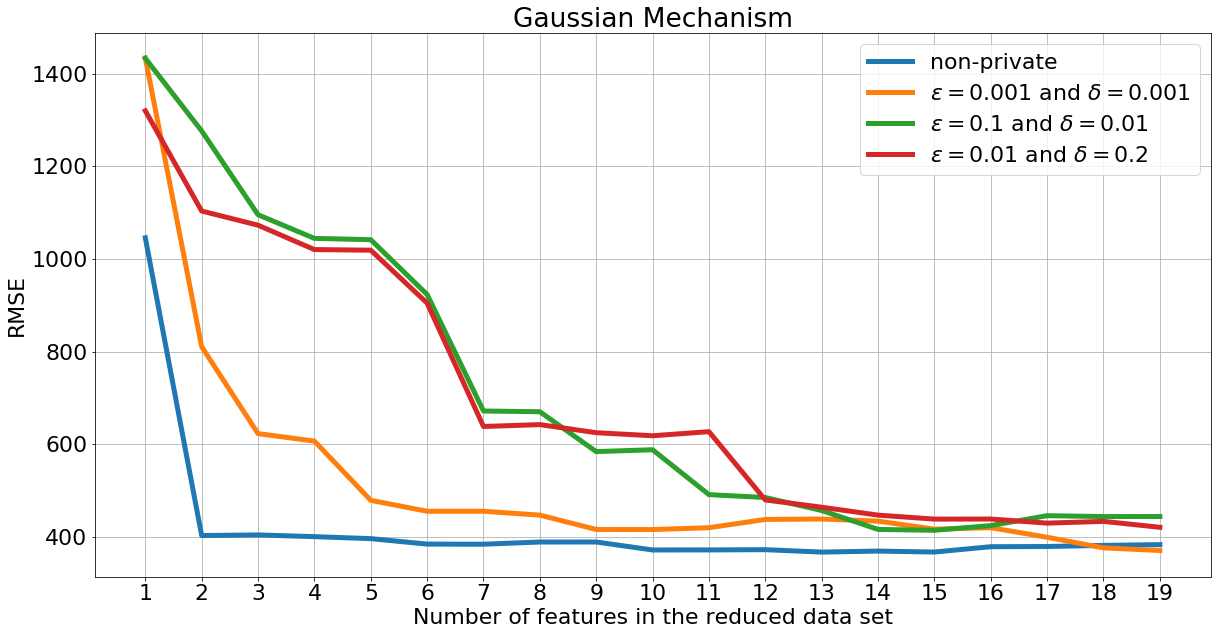

In [24]:
fig = plt.figure(figsize = (20, 10))
ax  = fig.add_subplot(1, 1, 1)
plt.grid()
plt.rcParams.update({'font.size': 22})
plt.xlabel("Number of features in the reduced data set")
plt.ylabel("RMSE")
plt.title("Gaussian Mechanism")
plt.plot(range(1, 20), rmse[:-1], label = 'non-private', linewidth = 5)
plt.plot(range(1, 20), rmse_gaussian_mechanism[0], label = '$\epsilon = 0.001$ and $\delta = 0.001$', linewidth = 5)
plt.plot(range(1, 20), rmse_gaussian_mechanism[7], label = '$\epsilon = 0.1$ and $\delta = 0.01$', linewidth = 5)
plt.plot(range(1, 20), rmse_gaussian_mechanism[16], label = '$\epsilon = 0.01$ and $\delta = 0.2$', linewidth = 5)
plt.legend(loc = 'best')
ax.set_xticks(range(1, 20))
plt.show()

fig.savefig('gaussian_mechanism.pdf')

## Wishart Input Perturbation

In [10]:
epsilon = [0.001, 0.01, 0.1, 0.5, 1]

rmse_wishart_mechanism = []
for _epsilon in epsilon:
    
    print("=" * 100)
    print("Running for epsilon {}".format(_epsilon))
    noisy_empirical_covariance_matrix = dp_algorithms.wishart_mechanism(x_train, _epsilon)
    
    eigen_values, eigen_vectors = np.linalg.eig(noisy_empirical_covariance_matrix)

    idx = eigen_values.argsort()[::-1]
    eigen_values  = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx] 
    
    print("Eigenvalues: {}".format(eigen_values))
    
    rmse_temporary = []
    for i in range(1, 20):
        projected_train = np.matmul(x_train, eigen_vectors[:,:i])
        projected_test  = np.matmul(x_test, eigen_vectors[:, :i])

        regression = LinearRegression().fit(projected_train, y_train)
        rmse_temporary.append(((y_test - regression.predict(projected_test)) ** 2).sum())

    print("RMSE: {}".format(rmse_temporary))
    
    rmse_wishart_mechanism.append(rmse_temporary)

Running for epsilon 0.001
Eigenvalues: [3.47525162e+02 2.98430334e+02 2.36468062e+02 2.36270200e+02
 2.13628205e+02 1.82658707e+02 1.65346256e+02 1.59326171e+02
 1.30002412e+02 1.25744761e+02 1.02148682e+02 9.77096574e+01
 8.84634398e+01 7.99985302e+01 6.71410096e+01 6.01182544e+01
 4.60566933e+01 4.17809422e+01 3.53346752e+01 2.99643752e+01
 2.64926143e+01 2.43386661e+01 1.66077111e+01 1.42191726e+01
 1.12582400e+01 8.95811385e+00 7.50474651e+00 4.97775450e+00
 3.70951019e+00 2.98320035e+00 8.02774322e-01 4.72464888e-02]
RMSE: [1077.630052222119, 1048.3914419853627, 1050.184510776949, 1049.7152417997277, 828.9685679515007, 645.2571392842987, 577.6798413127018, 578.2417378176677, 577.8075571003208, 569.3765059073204, 576.4380577063159, 555.1959763108641, 490.9169408752274, 458.7434322731169, 441.55927255215784, 424.19580250608544, 401.99258152906623, 404.1155236028546, 407.5227139730615]
Running for epsilon 0.01
Eigenvalues: [32.3484307  26.939992   26.5308909  22.47048294 21.21933473 

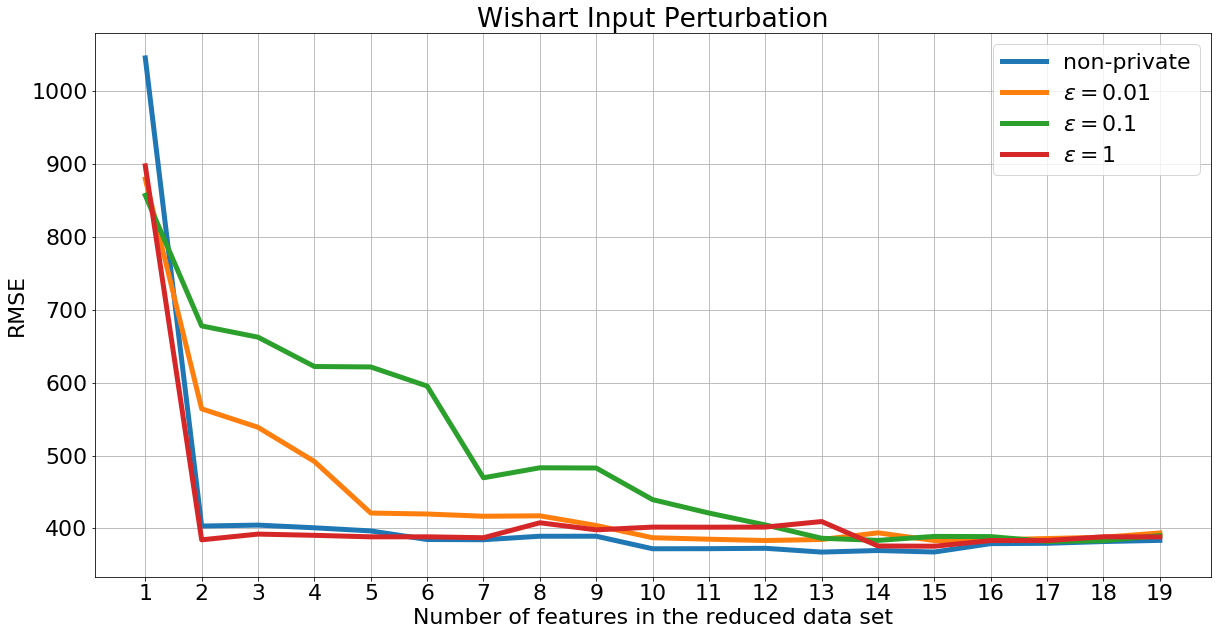

In [11]:
fig = plt.figure(figsize = (20, 10))
ax  = fig.add_subplot(1, 1, 1)
plt.grid()
plt.xlabel("Number of features in the reduced data set")
plt.ylabel("RMSE")
plt.title("Wishart Input Perturbation")
plt.plot(range(1, 20), rmse[:-1], label = 'non-private', linewidth = 5)
plt.plot(range(1, 20), rmse_wishart_mechanism[1], label = '$\epsilon = 0.01$', linewidth = 5)
plt.plot(range(1, 20), rmse_wishart_mechanism[2], label = '$\epsilon = 0.1$', linewidth = 5)
plt.plot(range(1, 20), rmse_wishart_mechanism[4], label = '$\epsilon = 1$', linewidth = 5)
plt.legend(loc = 'best')
ax.set_xticks(range(1, 20))
plt.show()

fig.savefig('wishart_mechanism.pdf')

## Laplace Input Perturbation

In [22]:
epsilon = [0.001, 0.01, 0.1, 0.5, 1]

rmse_laplace_mechanism = []
for _epsilon in epsilon:
    
    print("=" * 100)
    print("Running for epsilon {}".format(_epsilon))
    noisy_empirical_covariance_matrix = dp_algorithms.laplace_mechanism(x_train, _epsilon)
    
    eigen_values, eigen_vectors = np.linalg.eig(noisy_empirical_covariance_matrix)

    idx = eigen_values.argsort()[::-1]
    eigen_values  = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx] 
    
    print("Eigenvalues: {}".format(eigen_values))
    
    rmse_temporary = []
    for i in range(1, 20):
        projected_train = np.matmul(x_train, eigen_vectors[:,:i])
        projected_test  = np.matmul(x_test, eigen_vectors[:, :i])

        regression = LinearRegression().fit(projected_train, y_train)
        rmse_temporary.append(((y_test - regression.predict(projected_test)) ** 2).sum())

    print("RMSE: {}".format(rmse_temporary))
    
    rmse_laplace_mechanism.append(rmse_temporary)

Running for epsilon 0.001
Eigenvalues: [ 1678.70710726  1613.34848367  1565.11950743  1266.33937808
  1180.71670662  1062.43828322  1003.53986497   894.58592662
   812.64749127   675.80737443   619.48803898   431.23593399
   247.92232371   128.51709641     9.69049362   -22.43844375
   -99.74717724  -208.68501684  -323.59115178  -428.55459197
  -498.76292992  -591.29640059  -673.11799005  -715.84738221
  -772.03265466  -820.51058516 -1098.48824198 -1226.71023733
 -1297.6632525  -1351.70413003 -1737.30790335 -1762.83698216]
RMSE: [950.9866390675402, 954.7240809027196, 956.1485633055224, 686.9631946448914, 623.5863704320109, 574.4211612239019, 590.1174026971041, 591.0944804596803, 561.9884805702552, 556.7325032395429, 491.3296939256802, 507.7970252411569, 491.9370408553824, 490.3309238276479, 486.37319945734333, 462.42033663826544, 460.2678742281415, 461.06436671675874, 450.95411097497777]
Running for epsilon 0.01
Eigenvalues: [ 179.7086746   171.5421593   150.96862119  120.75049629  113.

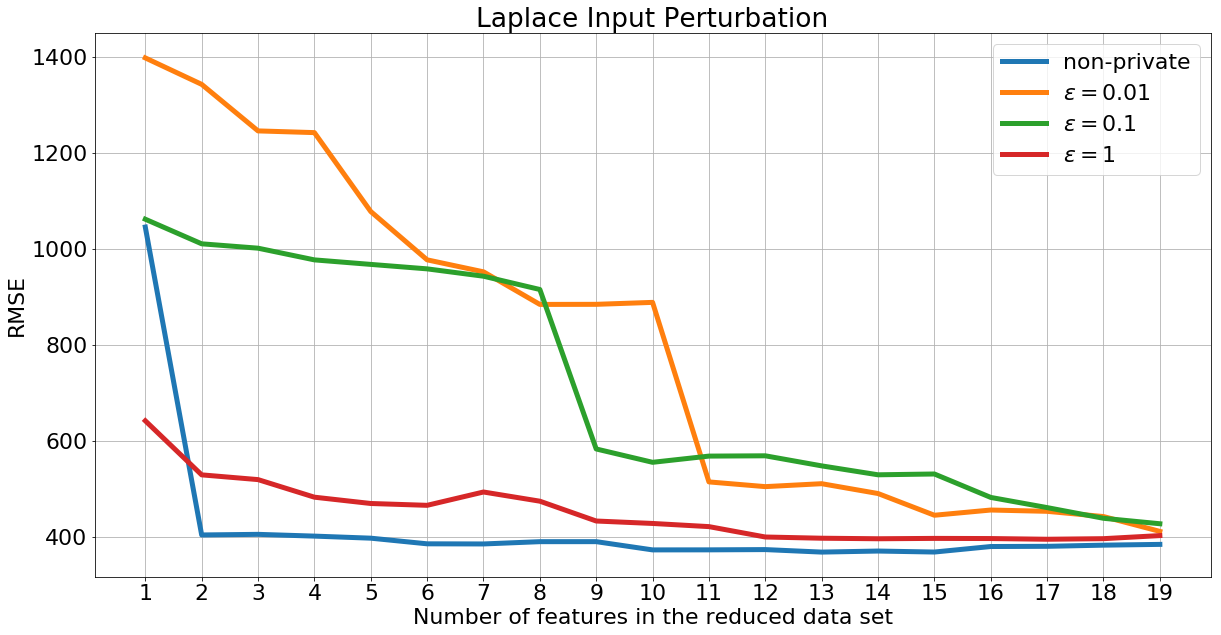

In [23]:
fig = plt.figure(figsize = (20, 10))
ax  = fig.add_subplot(1, 1, 1)
plt.grid()
plt.xlabel("Number of features in the reduced data set")
plt.ylabel("RMSE")
plt.title("Laplace Input Perturbation")
plt.plot(range(1, 20), rmse[:-1], label = 'non-private', linewidth = 5)
plt.plot(range(1, 20), rmse_laplace_mechanism[1], label = '$\epsilon = 0.01$', linewidth = 5)
plt.plot(range(1, 20), rmse_laplace_mechanism[2], label = '$\epsilon = 0.1$', linewidth = 5)
plt.plot(range(1, 20), rmse_laplace_mechanism[4], label = '$\epsilon = 1$', linewidth = 5)
plt.legend(loc = 'best')
ax.set_xticks(range(1, 20))
plt.show()

fig.savefig('laplace_mechanism.pdf')